In [1]:
import tensorflow as tf
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [4]:
df.shape

(1000, 12)

In [5]:
#sns.pairplot(df[['years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']], diag_kind = 'kde')

In [6]:
tensor_df =  tf.constant(df)
tensor_df =  tf.cast(tensor_df , tf.float32)
print(tensor_df)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [7]:
tensor_df = tf.random.shuffle(tensor_df)
print(tensor_df[:5])

tf.Tensor(
[[5.490000e+02 5.265410e+05 8.417120e+05 6.000000e+00 1.039180e+05
  4.000000e+00 7.000000e+00 1.400000e+01 1.450000e+02 1.150000e+02
  1.020000e+02 2.737610e+05]
 [6.630000e+02 6.288550e+05 8.719680e+05 3.000000e+00 8.998600e+04
  1.000000e+00 9.000000e+00 8.000000e+00 1.510000e+02 1.070000e+02
  1.020000e+02 4.200830e+05]
 [3.610000e+02 6.970980e+05 7.125900e+05 6.000000e+00 7.501100e+04
  1.000000e+00 1.000000e+00 8.000000e+00 1.870000e+02 6.500000e+01
  9.900000e+01 4.011205e+05]
 [7.520000e+02 5.061210e+05 7.637060e+05 2.000000e+00 5.855700e+04
  4.000000e+00 2.000000e+00 1.500000e+01 1.960000e+02 9.700000e+01
  8.700000e+01 4.015000e+05]
 [9.240000e+02 5.072720e+05 7.234230e+05 7.000000e+00 1.332510e+05
  4.000000e+00 3.000000e+00 1.300000e+01 1.990000e+02 1.020000e+02
  1.090000e+02 7.486300e+04]], shape=(5, 12), dtype=float32)


In [8]:
X = tensor_df[:, 3:-1]
print(X[:5])
print(X.shape)

tf.Tensor(
[[6.00000e+00 1.03918e+05 4.00000e+00 7.00000e+00 1.40000e+01 1.45000e+02
  1.15000e+02 1.02000e+02]
 [3.00000e+00 8.99860e+04 1.00000e+00 9.00000e+00 8.00000e+00 1.51000e+02
  1.07000e+02 1.02000e+02]
 [6.00000e+00 7.50110e+04 1.00000e+00 1.00000e+00 8.00000e+00 1.87000e+02
  6.50000e+01 9.90000e+01]
 [2.00000e+00 5.85570e+04 4.00000e+00 2.00000e+00 1.50000e+01 1.96000e+02
  9.70000e+01 8.70000e+01]
 [7.00000e+00 1.33251e+05 4.00000e+00 3.00000e+00 1.30000e+01 1.99000e+02
  1.02000e+02 1.09000e+02]], shape=(5, 8), dtype=float32)
(1000, 8)


In [9]:
y = tensor_df[:,  -1]
y = tf.expand_dims(y, axis = -1)
print(y.shape)
print(y[:5])

(1000, 1)
tf.Tensor(
[[273761. ]
 [420083. ]
 [401120.5]
 [401500. ]
 [ 74863. ]], shape=(5, 1), dtype=float32)


In [10]:
normalizer = Normalization(axis = -1, mean = [5,5,5,5,5], variance = [4,4,4,4,4])
x_normalized = tf.constant([[3,4,5,6,7],
                            [4,5,6,7,8]])
normalizer(x_normalized)

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[-1. , -0.5,  0. ,  0.5,  1. ],
       [-0.5,  0. ,  0.5,  1. ,  1.5]], dtype=float32)>

In [11]:
normalizer =  Normalization()
x_normalized  =  tf.constant([[3,4,5,6,7],
                             [4,10,7,8,9],
                             [30,9,7,9,5]])

normalizer.adapt(x_normalized)
normalizer(x_normalized)

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[-0.746733  , -1.3970013 , -1.4142138 , -1.3363061 ,  0.        ],
       [-0.6667259 ,  0.88900095,  0.70710665,  0.2672614 ,  1.2247448 ],
       [ 1.4134591 ,  0.50800055,  0.70710665,  1.0690452 , -1.2247448 ]],
      dtype=float32)>

In [12]:
print(X.shape)

(1000, 8)


In [13]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO =0.1
DATASET_SIZE = len(X)

In [14]:
x_train =  X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train =  y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(x_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [15]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(8).prefetch(tf.data.AUTOTUNE)


In [16]:
# for x,y in train_dataset:
#   print(x,y)
#   break
     

In [17]:
x_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(x_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [18]:
print(X.shape)
print(y.shape)


(1000, 8)
(1000, 1)


In [19]:
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val)).batch(8).repeat().prefetch(tf.data.AUTOTUNE)

In [20]:
x_test =  X[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test =  y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(x_test.shape)
print(y_test.shape)

(100, 8)
(100, 1)


In [21]:
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(8).prefetch(tf.data.AUTOTUNE)

In [22]:
normalizer =  Normalization()
normalizer.adapt(x_train)
normalizer(x_train)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[ 0.826997  ,  0.09797677,  0.725204  ,  0.47118285,  1.0759859 ,
        -1.1548378 ,  1.5103972 , -0.0851438 ],
       [-0.9325713 , -0.38180482, -1.4103662 ,  1.184421  , -1.586247  ,
        -0.84282494,  1.115764  , -0.0851438 ],
       [ 0.826997  , -0.8975046 , -1.4103662 , -1.6685313 , -1.586247  ,
         1.0292522 , -0.95606065, -0.22764362],
       [-1.519094  , -1.4641373 ,  0.725204  , -1.3119122 ,  1.5196913 ,
         1.4972715 ,  0.6224724 , -0.7976429 ],
       [ 1.4135197 ,  1.1081284 ,  0.725204  , -0.95529324,  0.6322804 ,
         1.6532779 ,  0.86911815,  0.24735577]], dtype=float32)>

In [23]:
print(X[:5])

tf.Tensor(
[[6.00000e+00 1.03918e+05 4.00000e+00 7.00000e+00 1.40000e+01 1.45000e+02
  1.15000e+02 1.02000e+02]
 [3.00000e+00 8.99860e+04 1.00000e+00 9.00000e+00 8.00000e+00 1.51000e+02
  1.07000e+02 1.02000e+02]
 [6.00000e+00 7.50110e+04 1.00000e+00 1.00000e+00 8.00000e+00 1.87000e+02
  6.50000e+01 9.90000e+01]
 [2.00000e+00 5.85570e+04 4.00000e+00 2.00000e+00 1.50000e+01 1.96000e+02
  9.70000e+01 8.70000e+01]
 [7.00000e+00 1.33251e+05 4.00000e+00 3.00000e+00 1.30000e+01 1.99000e+02
  1.02000e+02 1.09000e+02]], shape=(5, 8), dtype=float32)


In [24]:
model = tf.keras.Sequential([
    InputLayer(input_shape = (8,)),
    normalizer,
    Dense(128, activation  = 'relu'),
    Dense(128, activation  = 'relu'),
    Dense(128, activation  = 'relu'),
    Dense(1),
    
])
model.summary()

C:\Users\Adnan\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization)      │ (None, 8)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,322 (134.07 KB)

 Trainable params: 34,305 (134.00 KB)

 Non-trainable params: 17 (72.00 B)

In [25]:
model.compile(optimizer = Adam(learning_rate = 0.1),
              loss = MeanAbsoluteError,
             metrics = [RootMeanSquaredError()])

In [26]:
# steps_per_epoch = len(x_train) // 8  # total samples in training data divided by batch size
# validation_steps = len(x_val) 

In [27]:
history = model.fit(train_dataset, validation_data = (x_val, y_val), epochs = 100,  verbose = 1)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 150023.3438 - root_mean_squared_error: 189458.3750 - val_loss: 53272.8438 - val_root_mean_squared_error: 64100.0430
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 51412.8242 - root_mean_squared_error: 62466.0469 - val_loss: 52786.8867 - val_root_mean_squared_error: 64159.8633
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 52141.7852 - root_mean_squared_error: 64047.6367 - val_loss: 83827.7578 - val_root_mean_squared_error: 99303.7344
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53409.6680 - root_mean_squared_error: 67036.7109 - val_loss: 53593.3008 - val_root_mean_squared_error: 64210.3789
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 48346.9414 - root_mean_squared_error: 60694.2539 - val_loss: 44036.0117 - val_root_mean_squared_error: 52613.4609
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40228.0547 - root_mean_squared_error: 51303.2500 - val_loss: 4

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34241.3984 - root_mean_squared_error: 43956.5820 - val_loss: 36828.2539 - val_root_mean_squared_error: 44060.5547
Epoch 41/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 34970.5664 - root_mean_squared_error: 44165.8672 - val_loss: 39754.1758 - val_root_mean_squared_error: 47156.2031
Epoch 42/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36413.0117 - root_mean_squared_error: 45864.7969 - val_loss: 44176.3047 - val_root_mean_squared_error: 52907.1836
Epoch 43/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35787.9023 - root_mean_squared_error: 45056.8281 - val_loss: 44871.3516 - val_root_mean_squared_error: 53109.1875
Epoch 44/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36719.2148 - root_mean_squared_error: 45689.3086 - val_loss: 37386.8438 - val_root_mean_squared_error: 45053.3750
Epoch 45/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34079.8945 - root_mean_squared_error: 43103.4375 - val_loss: 38604.0781

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30864.0098 - root_mean_squared_error: 40276.8047 - val_loss: 41173.3242 - val_root_mean_squared_error: 48739.6250
Epoch 80/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30374.2285 - root_mean_squared_error: 39697.4727 - val_loss: 39843.3281 - val_root_mean_squared_error: 47942.6172
Epoch 81/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30661.0215 - root_mean_squared_error: 39650.8477 - val_loss: 40163.4492 - val_root_mean_squared_error: 47344.8711
Epoch 82/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29651.6797 - root_mean_squared_error: 38692.3867 - val_loss: 40544.3320 - val_root_mean_squared_error: 48120.9766
Epoch 83/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30518.1816 - root_mean_squared_error: 39987.7461 - val_loss: 39829.6914 - val_root_mean_squared_error: 47452.2617
Epoch 84/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30757.5254 - root_mean_squared_error: 40671.0977 - val_loss: 40290.6250

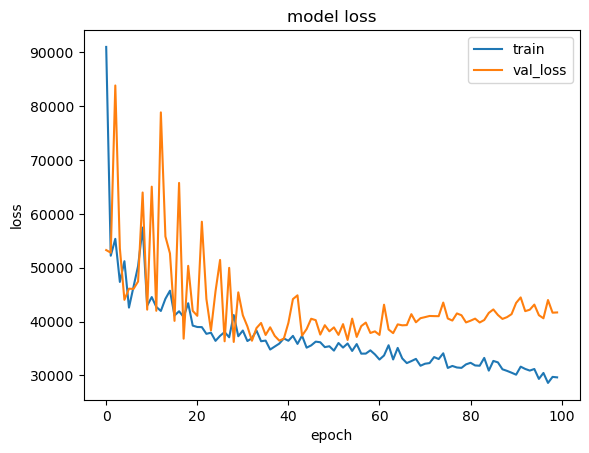

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show()

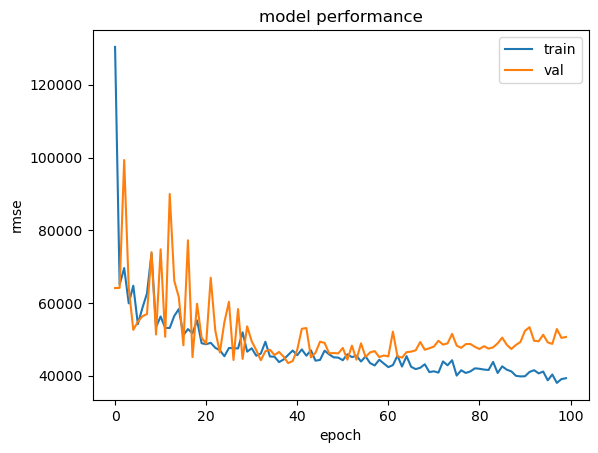

In [29]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model performance')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()
     

In [30]:
model.evaluate(x_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 42869.3984 - root_mean_squared_error: 52308.1172 


[41745.98828125, 51825.6953125]

In [31]:
x_test.shape

TensorShape([100, 8])

In [32]:
model.predict(tf.expand_dims(x_test[0], axis = 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[184356.17]], dtype=float32)

In [33]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([129863.], dtype=float32)>

In [34]:
y_true = list(y_test[:,0].numpy())

In [35]:
y_pred = list(model.predict(x_test)[:,0])
print(y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
[184356.17, 117333.09, 531286.56, 421817.25, 335087.2, 179710.58, 347990.22, 459788.1, 372994.66, 91922.05, 580496.25, 213895.45, 212808.64, 277164.66, 154299.23, 292754.53, 489258.38, 446046.38, 444351.62, 437118.47, 241185.47, 208759.94, 307203.34, 356703.8, 148437.42, 390475.9, 317493.44, 478113.84, 429119.5, 460621.34, 276689.84, 336574.34, 475970.66, 445582.34, 282718.78, 229576.62, 243642.66, 339110.66, 73835.74, 258157.97, 181892.62, 479265.2, 465151.8, 438924.2, 549372.3, 309571.28, 103057.04, 380244.5, 355440.53, 343219.75, 183684.8, 247658.9, 516699.9, 345129.28, 354612.72, 114143.52, 355280.28, 491130.06, 445224.28, 171969.69, 373162.97, 494812.1, 348144.3, 466311.78, 265885.34, 397574.53, 289445.03, 213110.34, 475286.9, 130037.625, 553197.8, 398980.97, 220479.33, 322931.12, 443880.03, 119927.08, 256291.28, 318815.9, 123916.06, 432196.72, 304722.0, 312437.12, 429871.0, 158400.8, 405119.97, 521276.22, 558728.94, 222754.2, 163655.72, 46820

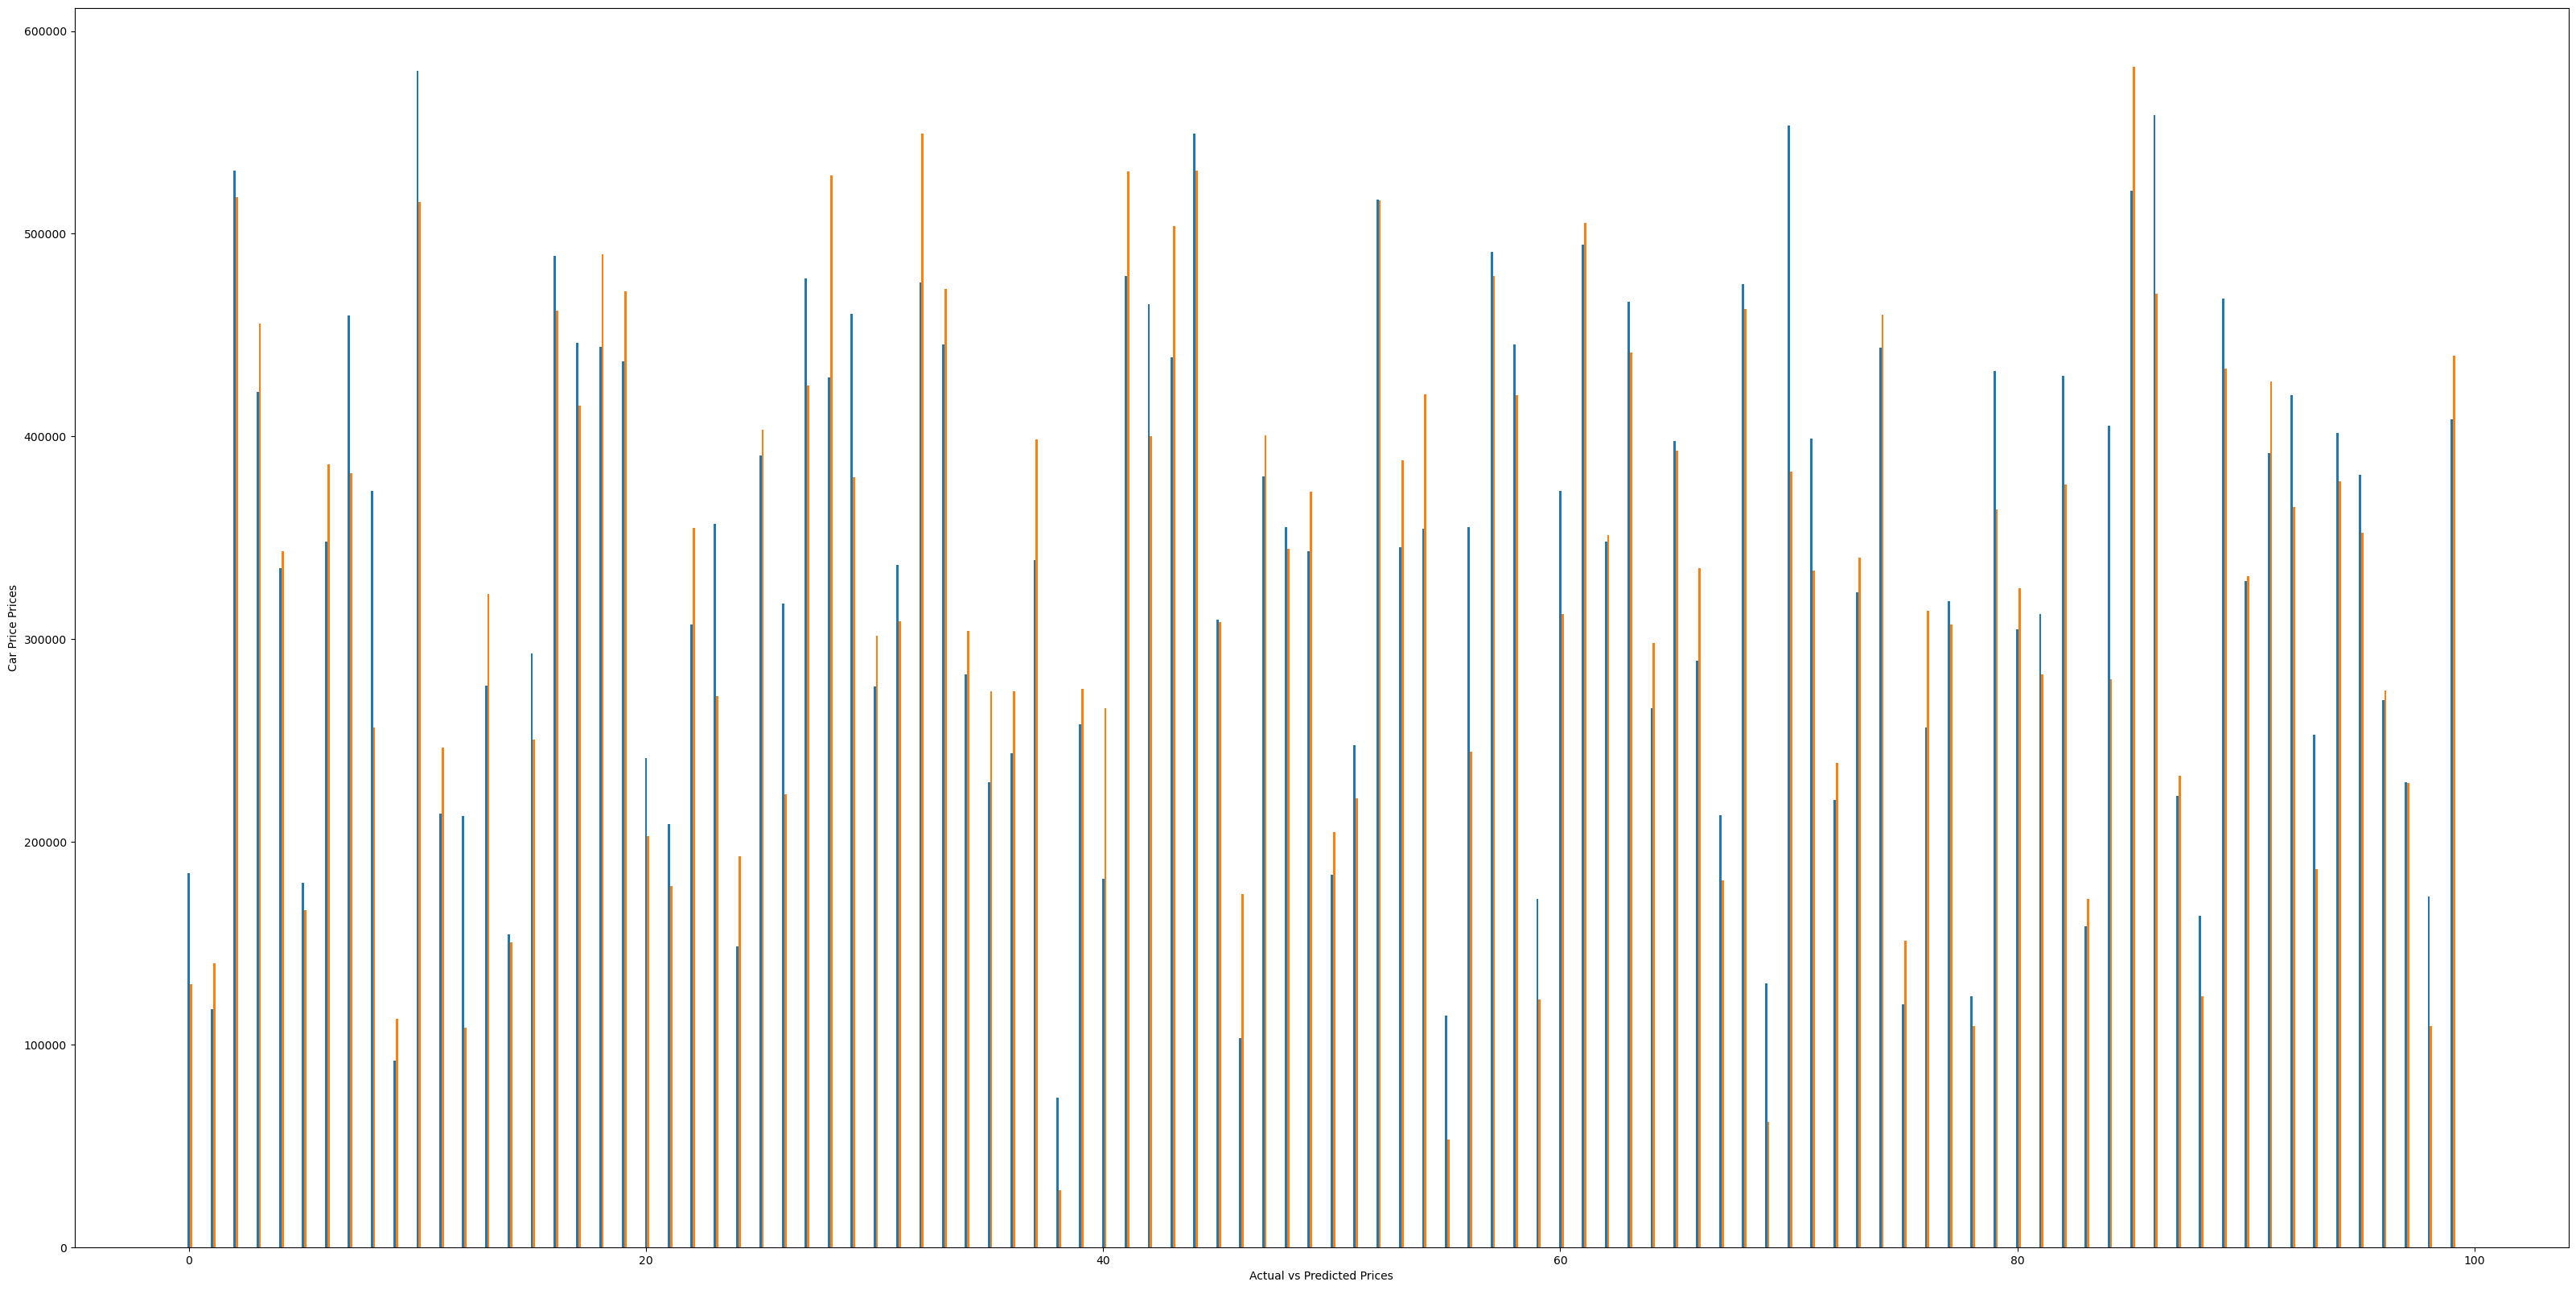

In [36]:
ind = np.arange(100)
plt.figure(figsize=(40,20))

width = 0.1

plt.bar(ind, y_pred, width, label='Predicted Car Price')
plt.bar(ind + width, y_true, width, label='Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')

plt.show()
     